![](WizualnaAnalitykaDanych.png)

# Programowanie w języku python - projekt zaliczeniowy
Michał Domaradzki - 01174948@pw.edu.pl

## **Zbiór danych:**
Dane pochodzą portalu Kaggle: [London bike sharing dataset](https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset)

Zbiór zwiera informacje o liczbie wypożyczeń rowerów miejskich w Londynie, w latach: 2015 - 2017. Dane zawierają informacje o typie dnia(weekend/święto),porze roku, do dyspozycji są też 
informacje o pogodzie (temperatura, wilgotność, prędkość wiatru).
Są trzy źródeła informacji:
* Https://cycling.data.tfl.gov.uk/ 
* freemeteo.com - weather data
* https://www.gov.uk/bank-holidays

Wartości są pogrupowane w godziny.

## **Ogólny cel analizy:**
* weryfikacja i zapoznanie się z danymi wejściowymi
* wizualizacja wybranych aspektów
* predykcja liczby wypożyczeń


In [1]:
# importuje biblioteki, których planuje użyć
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
# używam biblioteki Pandas do importu zbiór danych jako dataframe
london=pd.read_csv('G:/My Drive/Wizualna analityka danych - PW/PJP/Projekt_Zaliczeniowy/london_merged.csv')

In [3]:
# wyświetlam pierwsze 10 wierszy
london.head(10)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0


#### **Opis danych**
*   timestamp - timestamp field for grouping the data
*   cnt - the count of a new bike shares
*   t1 - real temperature in C
*   t2 - temperature in C “feels like”
*   hum - humidity in percentage
*   wind_speed - wind speed in km/h
*   weather_code - category of the weather *
*   is_holiday -  1 holiday / 0 non holiday
*   is_weekend -  1 if the day is weekend
*   season - category  seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

weathe_code category description:
    1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog


In [4]:
# sprawdzam podstawowe informacje o danych
london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


### Moje obserwacje: 
* zbiór zwiera 17414 rekordów 
* żadna z kolumn nie zawiera pustych wartości, nie muszę nic uzupełniać.
* kolumna timestamp ma typ object, zamienie go na na datetime
* usunę zmienną T2 (temperatura odczuwalna), w  analizie będę posługiwał się jedynie zmierzoną temperaturą T1.
* nie planuje korzystać z danych opisujących wilgotność (hum) oraz prędkość wiatru (wind_speed)

In [5]:
#usuwam kolumny, z których nie planują korzystać
london.drop(['t2','hum','wind_speed'], axis = 1., inplace = True)

In [6]:
#zamiana kolumny timestamp na tym datetime
london['timestamp'] = pd.to_datetime(london['timestamp'])
london.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [7]:
#z kolumny timestamp, wyodrębniam dane o roku, miesiacu, dniu, weekendzie, godzinie i zapisuje je w osobnych kolumnach
london["year"] = london['timestamp'].dt.year
london["month"] = london['timestamp'].dt.month
london["day_of_month"] = london['timestamp'].dt.day
london["day_of_week"] = london['timestamp'].dt.weekday
london["hour"] = london['timestamp'].dt.hour
london.head()

,timestamp,cnt,t1,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour
0,2015-01-04 00:00:00,182,3.0,3.0,0.0,1.0,3.0,2015,1,4,6,0
1,2015-01-04 01:00:00,138,3.0,1.0,0.0,1.0,3.0,2015,1,4,6,1
2,2015-01-04 02:00:00,134,2.5,1.0,0.0,1.0,3.0,2015,1,4,6,2
3,2015-01-04 03:00:00,72,2.0,1.0,0.0,1.0,3.0,2015,1,4,6,3
4,2015-01-04 04:00:00,47,2.0,1.0,0.0,1.0,3.0,2015,1,4,6,4


In [8]:
#wyświetlam podstawowe informacje statystyczne dla dataframe-a
london.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
weather_code,17414.0,2.722752,2.341163,1.0,1.0,2.0,3.00,26.0
is_holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
is_weekend,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0
season,17414.0,1.492075,1.118911,0.0,0.0,1.0,2.00,3.0
year,17414.0,2015.507810,0.508157,2015.0,2015.0,2016.0,2016.00,2017.0
month,17414.0,6.514643,3.452509,1.0,4.0,7.0,10.00,12.0
day_of_month,17414.0,15.751981,8.793704,1.0,8.0,16.0,23.00,31.0
day_of_week,17414.0,2.992650,2.004060,0.0,1.0,3.0,5.00,6.0


### Moje obserwacje: 
* w danych na temat wypożyczeń rowerów (cnt) wartość MAX (7860) wyraźnie odstaje od średniej (1143)

# Analiza danych wejściowych

In [9]:
# sprawdzam sumę wypożyczeń rowerów (cnt.sum()) dla wybranych zmiennych: 

for column in ['weather_code','month','season','hour']:
    print(london.groupby(column).cnt.sum())


weather_code
1.0     7146847
2.0     6035580
3.0     4243887
4.0      929978
7.0     1526461
10.0       8168
26.0      15051
Name: cnt, dtype: int64
month
1     1166837
2     1136504
3     1352461
4     1600427
5     1897348
6     1967130
7     2286214
8     2171265
9     1891097
10    1800752
11    1381191
12    1254746
Name: cnt, dtype: int64
season
0.0    4850236
1.0    6424609
2.0    5073040
3.0    3558087
Name: cnt, dtype: int64
hour
0      210401
1      145257
2       98275
3       67951
4       52859
5       79820
6      338771
7     1066309
8     2087164
9     1201745
10     771879
11     836936
12    1045180
13    1096178
14    1071619
15    1140609
16    1364955
17    2059938
18    1913944
19    1200648
20     770461
21     538147
22     429497
23     317429
Name: cnt, dtype: int64


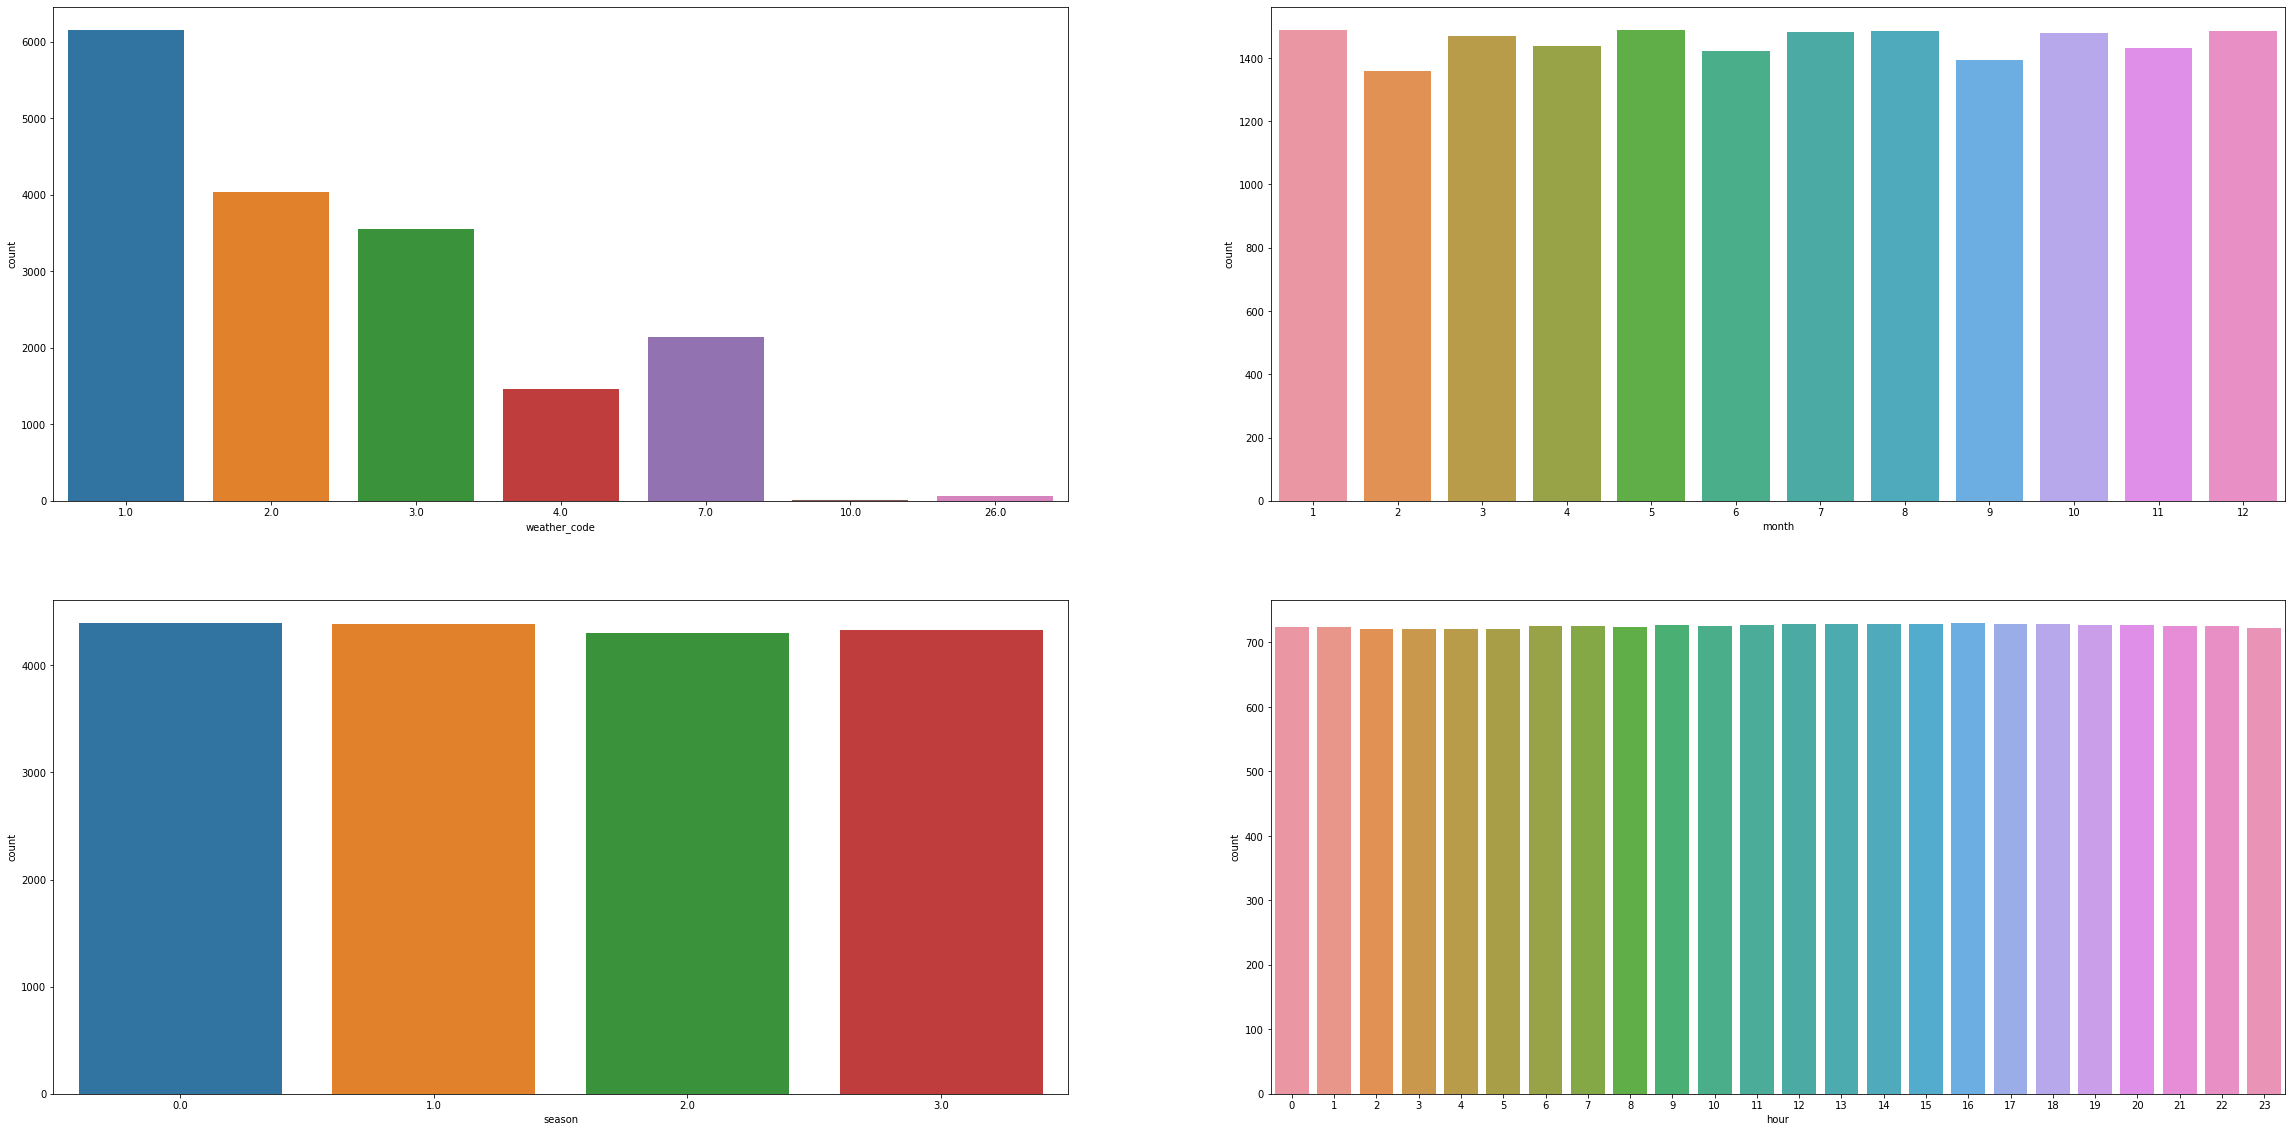

In [10]:
f, axes = plt.subplots(2, 2,figsize=(40,20))
sns.countplot(london.weather_code, x='cnt',  ax=axes[0,0])
sns.countplot(london.month, x='cnt',  ax=axes[0,1])
sns.countplot(london.season, x='cnt', ax=axes[1,0])
sns.countplot(london.hour, x='cnt',  ax=axes[1,1])

plt.show()

In [11]:
#Sprawdzam średnią liczbę wypożyczeń dla wybranych zmiennych
for column in ['weather_code','month','season','hour']:
    print(london.groupby(column).cnt.mean().astype('int'))

weather_code
1.0     1162
2.0     1496
3.0     1195
4.0      635
7.0      712
10.0     583
26.0     250
Name: cnt, dtype: int32
month
1      784
2      836
3      921
4     1112
5     1275
6     1383
7     1543
8     1463
9     1356
10    1217
11     965
12     845
Name: cnt, dtype: int32
season
0.0    1103
1.0    1464
2.0    1178
3.0     821
Name: cnt, dtype: int32
hour
0      290
1      200
2      136
3       94
4       73
5      110
6      466
7     1468
8     2882
9     1653
10    1064
11    1151
12    1433
13    1505
14    1472
15    1564
16    1869
17    2829
18    2629
19    1651
20    1059
21     741
22     592
23     439
Name: cnt, dtype: int32


In [12]:
print(london.groupby(['season','is_weekend','weather_code']).cnt.mean().astype('int'))
print(london.groupby(['season','is_weekend','weather_code']).cnt.count().astype('int'))

season  is_weekend  weather_code
0.0     0.0         1.0             1160
                    2.0             1496
                    3.0             1274
                    4.0              402
                    7.0              757
                    10.0             824
                    26.0              71
        1.0         1.0             1094
                    2.0             1258
                    3.0              969
                    4.0              669
                    7.0              490
                    10.0             643
                    26.0              92
1.0     0.0         1.0             1533
                    2.0             1876
                    3.0             1435
                    4.0              497
                    7.0              922
                    10.0             368
        1.0         1.0             1316
                    2.0             1872
                    3.0             1289
                    4.0 

### Moje obserwacje: 
* Najwyższa średnia liczba wypożyczanych rowerów (1327) przypada na dni pracujące (is_weekend = 0), przejrzystą pogodę (weather_code=0) w sezonie wiosennym (season 0 =  spring). Niewiele mniejsza średnia, bo wynosząca 1299 wypozyczeń, jest dla takich samych warunków w sezonie letnim (season 1 = summer)

[Text(0.5, 1.0, 'Liczba wypożyczonych rowerów według daty'),
 Text(0.5, 0, 'Data'),
 Text(0, 0.5, 'Liczba wypożyczonych rowerów')]

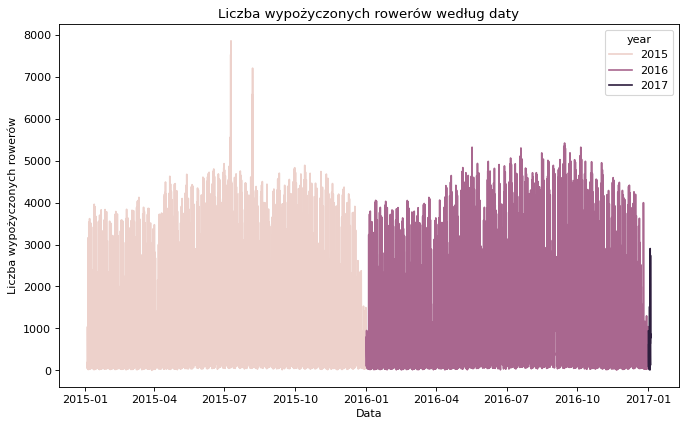

In [13]:
#Sprawzdam jak wygląda liczba wypożyczeń rowerów na przestrzeni lat 
plt.figure(figsize=(10,6), dpi=80)
sns.lineplot(data=london,x='timestamp',y='cnt', hue="year").set(title="Liczba wypożyczonych rowerów według daty",xlabel='Data',ylabel='Liczba wypożyczonych rowerów')

[Text(0.5, 1.0, 'Liczba wypożyczonych rowerów w poszczególnych miesiącach'),
 Text(0.5, 0, 'Miesiąc'),
 Text(0, 0.5, 'Liczba wypożyczonych rowerów')]

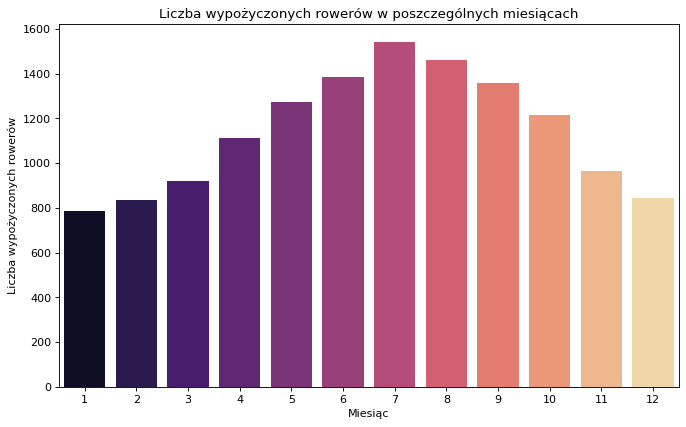

In [14]:
#liczba wypożyczeń rowerów po miesiącach
plt.figure(figsize=(10,6), dpi=80)
sns.barplot(x="month", y="cnt", data=london,ci=None,palette="magma").set(title="Liczba wypożyczonych rowerów w poszczególnych miesiącach",xlabel='Miesiąc',ylabel='Liczba wypożyczonych rowerów')
#plt.legend(title='month',bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

[Text(0.5, 1.0, 'Liczba wypożyczonych rowerów dla poszczególnych pór roku'),
 Text(0.5, 0, 'Pora roku'),
 Text(0, 0.5, 'Liczba wypożyczonych rowerów')]

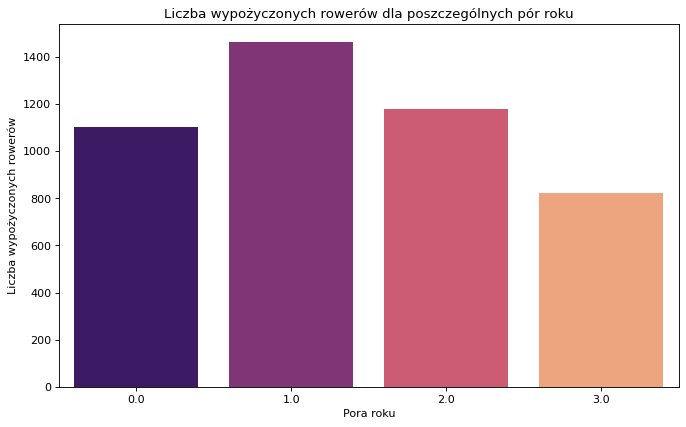

In [15]:
#liczba wypożyczeń rowerów po miesiącach
plt.figure(figsize=(10,6), dpi=80)
sns.barplot(x="season", y="cnt", data=london,ci=None,palette="magma").set(title="Liczba wypożyczonych rowerów dla poszczególnych pór roku",xlabel='Pora roku',ylabel='Liczba wypożyczonych rowerów')
#plt.legend(title='month',bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

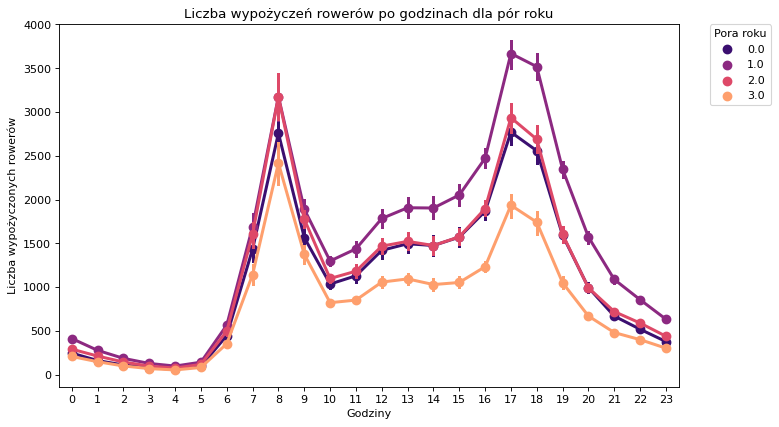

In [16]:
#Sprawdzam róznice w godzinach wypożyczeń rowerów w zależności od pór roku
plt.figure(figsize=(10,6), dpi=80)
sns.pointplot(data=london, x="hour", y="cnt", hue="season",palette="magma").set(title="Liczba wypożyczeń rowerów po godzinach dla pór roku",xlabel='Godziny',ylabel='Liczba wypożyczonych rowerów')
plt.legend(title='Pora roku',bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

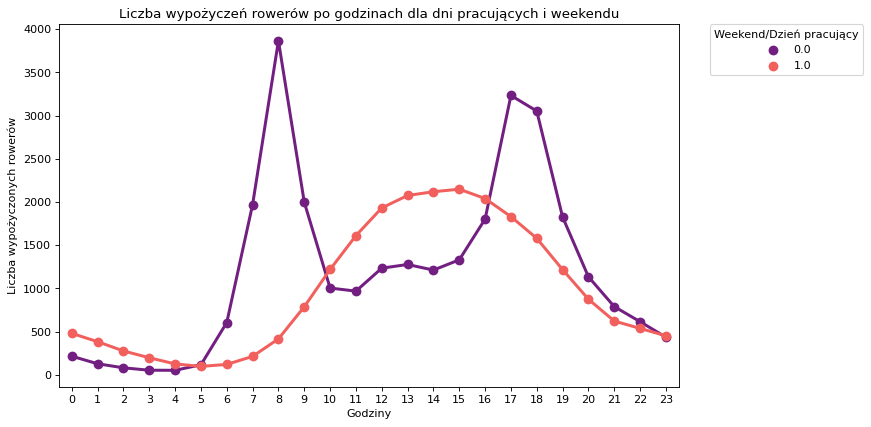

In [17]:
#Sprawdzam jak zmieniają się godziny wypożyczeń rowerów w ciągu weekendu oraz dni pracujących
plt.figure(figsize=(10,6), dpi=80)
sns.pointplot(data=london, x="hour", y="cnt", hue="is_weekend",palette="magma",ci=None).set(title="Liczba wypożyczeń rowerów po godzinach dla dni pracujących i weekendu",xlabel='Godziny',ylabel='Liczba wypożyczonych rowerów')
plt.legend(title='Weekend/Dzień pracujący',bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

<Figure size 800x480 with 0 Axes>

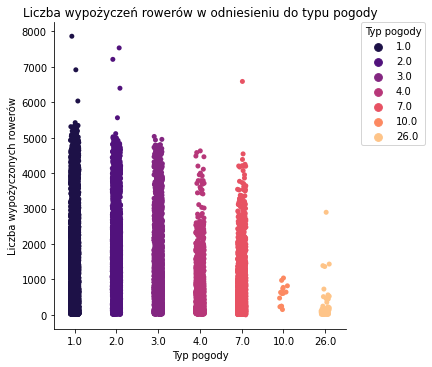

In [18]:
#Sprawdzam jak zmieniają się liczba wypożyczeń rowerów w zależności od pogody
plt.figure(figsize=(10,6), dpi=80)
sns.catplot(x='weather_code',y='cnt',data=london,palette="magma",ci=None,hue="weather_code").set(title="Liczba wypożyczeń rowerów w odniesieniu do typu pogody",xlabel='Typ pogody',ylabel='Liczba wypożyczonych rowerów')
plt.legend(title='Typ pogody',bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)



[Text(0.5, 1.0, 'Liczba wypożyczeń rowerów w według dni tygodnia'),
 Text(0.5, 0, 'Dzień tygodnia'),
 Text(0, 0.5, 'Liczba wypożyczonych rowerów')]

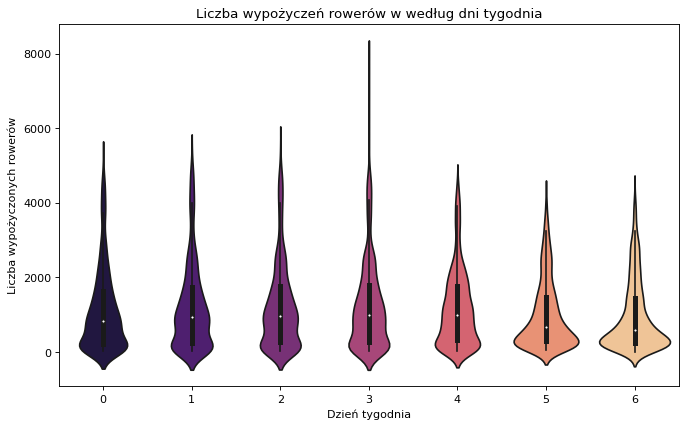

In [19]:
#Sprawdzam jak zmieniają się liczba wypożyczeń rowerów w zależności od pogody
plt.figure(figsize=(10,6), dpi=80)
sns.violinplot(x='day_of_week',y='cnt', data=london,palette="magma").set(title="Liczba wypożyczeń rowerów w według dni tygodnia",xlabel='Dzień tygodnia',ylabel='Liczba wypożyczonych rowerów')
#plt.legend(title='Typ pogody',bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

<AxesSubplot:>

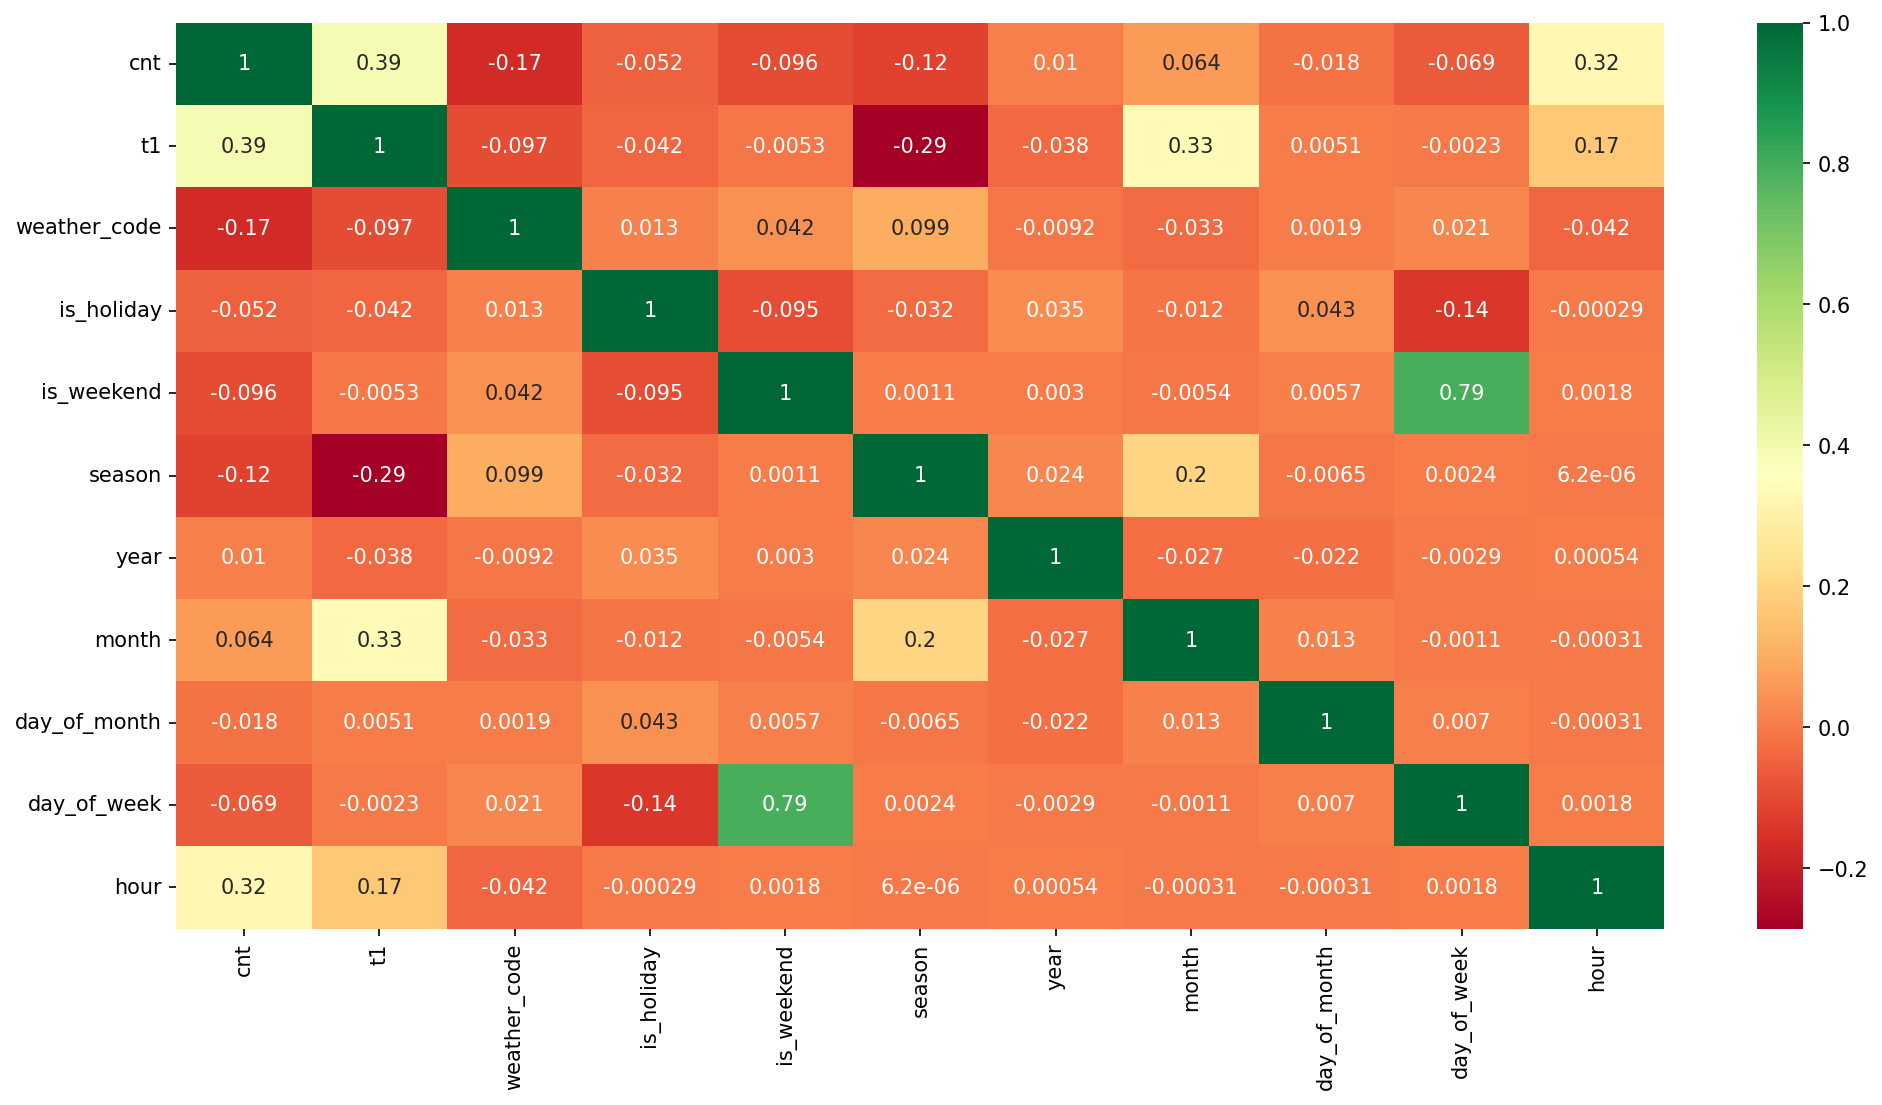

In [20]:
#wykres korelacji
plt.figure(figsize=(16,8), dpi=150)
sns.heatmap(london.corr(),cmap='RdYlGn',annot=True)

### Moje obserwacje: 
* najwięcej rowerów jest wypożyczanych w sezonie letnim
* średni przebieg dobowy wypożyczeń nie rózni się w zależności od sezonu. W ciągu doby są dwa szczytowe momenty - poranny, godzina 8, oraz popołudniowo/wieczory 17-18
* godziny wypożyczeń rowerów w weekendy znacznie różnią się od tych w dni pracujace. Dynamika weekendowa jest dużo mniejsza, krzywa wypożyczeń ma łagodny przebieg z punktem szczytowym o godzinie 15
* Najwięcej rowerów wypożyczancyh jest trzeciego dnia tygodnia
* Z liczbą wypożyczeń najsilniej koreluje temperatura oraz godzina


# Regresja liniowa - linear regression [lr]

In [21]:
london.describe()

,cnt,t1,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.00000,17414.000000
mean,1143.101642,12.468091,2.722752,0.022051,0.285403,1.492075,2015.507810,6.514643,15.751981,2.99265,11.513265
std,1085.108068,5.571818,2.341163,0.146854,0.451619,1.118911,0.508157,3.452509,8.793704,2.00406,6.915893
min,0.000000,-1.500000,1.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.00000,0.000000
25%,257.000000,8.000000,1.000000,0.000000,0.000000,0.000000,2015.000000,4.000000,8.000000,1.00000,6.000000
50%,844.000000,12.500000,2.000000,0.000000,0.000000,1.000000,2016.000000,7.000000,16.000000,3.00000,12.000000
75%,1671.750000,16.000000,3.000000,0.000000,1.000000,2.000000,2016.000000,10.000000,23.000000,5.00000,18.000000
max,7860.000000,34.000000,26.000000,1.000000,1.000000,3.000000,2017.000000,12.000000,31.000000,6.00000,23.000000


In [22]:
#tworzę kopię oryginalnego data frama
london_lr=london.copy()

In [23]:
#usuwam kolumny, z których nie planują korzystać
london_lr.drop(['timestamp','year','day_of_month'], axis = 1., inplace = True)

In [24]:
london_lr.head()

,cnt,t1,weather_code,is_holiday,is_weekend,season,month,day_of_week,hour
0,182,3.0,3.0,0.0,1.0,3.0,1,6,0
1,138,3.0,1.0,0.0,1.0,3.0,1,6,1
2,134,2.5,1.0,0.0,1.0,3.0,1,6,2
3,72,2.0,1.0,0.0,1.0,3.0,1,6,3
4,47,2.0,1.0,0.0,1.0,3.0,1,6,4


## Regresją liniową z jednym predyktorem

In [25]:
#wyznaczamy wartości do predykcji
x = london_lr[['cnt']]
#zmienne predykcyjne - temperatura
y = london_lr['t1']

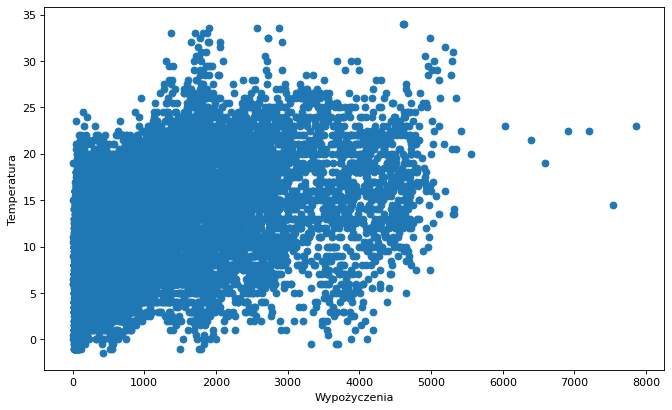

In [26]:
#rysuję wykres zależności
plt.figure(figsize=(10,6), dpi=80)
plt.xlabel('Wypożyczenia')
plt.ylabel('Temperatura')
#plt.scatter(london_lr.t1,london_lr.cnt)
plt.plot(x,y,linestyle='None',marker='o')

In [27]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)
y_pred=lr.predict(x)
y_pred

array([10.54934369, 10.46150191, 10.4535163 , ..., 10.8587863 ,
       10.63319265, 10.46349832])

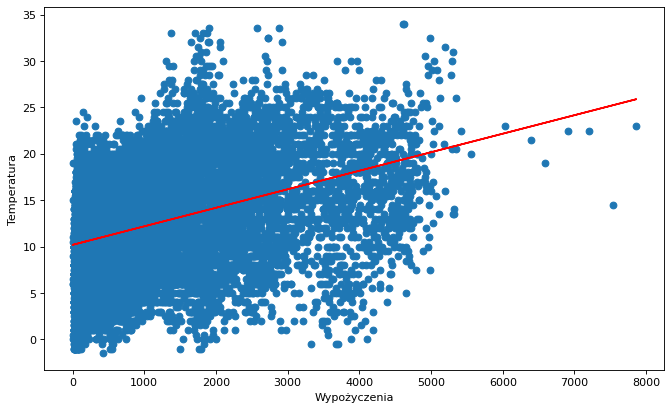

In [28]:
#rysuję wykres 
plt.figure(figsize=(10,6), dpi=80)
plt.xlabel('Wypożyczenia')
plt.ylabel('Temperatura')
plt.scatter(x,y)
plt.plot(x, y_pred, color='red')
plt.show()

In [29]:
lr.coef_

array([0.0019964])

In [30]:
lr.intercept_

10.185998167649126

## Regresją liniową dla kilku predyktorów

In [31]:
#wyznaczamy wartości do predykcji
Y = london_lr[['cnt']]
#zmienne predykcyjne - wszystkie pozostałe kolumny
X = london_lr.drop('cnt', axis = 1)
#X = london_lr[['t1','weather_code','is_weekend','day_of_week', 'hour']]


In [32]:
from sklearn.model_selection import train_test_split 

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3) #, random_state=10

In [34]:
from sklearn.linear_model import LinearRegression
lr2=LinearRegression()
lr2.fit(X_train,Y_train)

LinearRegression()

In [35]:
lr2.score(X_test,Y_test)

0.2338140249333409

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg=LogisticRegression(max_iter=10)
logreg.fit(X_train,Y_train)
Y_pred=logreg.predict(X_test)
print(Y_pred)
print(metrics.accuracy_score(Y_test,Y_pred))

[ 640 1692   88 ...   57   57  153]
0.0022966507177033493


In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
logreg=LogisticRegression()
logreg.fit(X_train_scaled,Y_train)
Y_pred=logreg.predict(sc.transform(X_test))
print(y_pred)
print(metrics.accuracy_score(Y_test,Y_pred))

[10.54934369 10.46150191 10.4535163  ... 10.8587863  10.63319265
 10.46349832]
0.0022966507177033493


### Moje obserwacje: 
* Aby poprawić wynik można: usunąc wartości odstające (max CTN wynoszący kilkukrotność średnije)
* dobrze wyselekcjonować zmienne wpływające na predykcję
* wybróbować inne modele